Nº USP: 9322732

### Dedução da $g(x)$

Considerando a EDP parabólica:

$$
u_t = u_{xx} + g(x)
$$

E com solução manufaturada:

$$
u(x,t) = e^{-t}cos(x) + x sin(x)
$$

Vamos deduzir a $g(x)$, considerando o problema com condições de contorno de Dirichlet em $x = 0$ e de Neumann em $x = 1$ dadas pela solução proposta, e com condição inicial dada pela solução manufaturada para todo $x$ em $t = 0$.

Da expressão da EDP parabólica, temos que:

$$
g(x) = u_t - u_{xx}
$$

Utilizando a solução manufaturada, obtemos:
$$
u_t = -e^{-t}cos(x)
$$

E

$$
u_{x} = (1 - e^{-t})sin(x) + x cos(x)\\
u_{xx} = (2 - e^{-t})cos(x) - x sin(x)
$$

Portanto, segue que:

$$
g(x) = x sin(x) - 2 cos(x)
$$

### Condições de contorno e condição inicial

Utilizando a solução manufaturada, a condição de contorno de Dirichlet em $x = 0$ nos diz que:

$$
u(0,t) = e^{-t}
$$

Já para a condição de Neumann em $x = 1$, obtemos:

$$
u(1,t) = (1- e^{-t})sin(1) + cos(1)
$$

Por fim, a condição inicial para todo $x$ em $t = 0$ é dada por:

$$
u(x,0) = cos(x) + x sin(x)
$$.

Com isso, temos o suficiente para iniciar a implementação dos métodos

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def manufaturada(x,t):
    return np.exp(-t)*np.cos(x) + x*np.sin(x)

In [3]:
def g(x):
    return x*np.sin(x) - 2*np.cos(x)

In [4]:
def dirichlet(t):
    return np.exp(-t)

In [5]:
def neumann(t):
    return (1 - np.exp(-t))*np.sin(1) + np.cos(1)

### a) Forward Difference

In [6]:
nt = 1000
tf = 1.
lx = 1.
k = tf/nt

In [7]:
k

0.001

In [8]:
1 / (2*k)**0.5

22.360679774997898

In [11]:
nx = 22

In [12]:
h = lx / nx

In [13]:
y = k / (h**2)

In [14]:
x = np.linspace(0., lx, nx)
u_0 = manufaturada(x,0)

In [15]:
u = np.empty((nt+1, nx))
u[0] = u_0.copy()

for j in range(0,nt):
    u[j+1][0] = dirichlet((j+1)*k)
    u_ghost = u[j][-2] + 2*h*neumann(j*k) 
    u[j+1][-1] = (1-2*y)*u[j][-1] + y*(u_ghost + u[j][-2]) + k*g(1.)
    
    for i in range(1,nx-1):
        u[j+1][i] = (1 - 2*y)*u[j][i] + y*(u[j][i+1] + u[j][i-1]) + k*g(x[i]) 

In [16]:
err = np.empty(nt+1)
sol = np.empty((nt+1, nx))

for t in range(nt+1):    
    for i in range(nx):
        sol[t][i] = manufaturada(i*h,t*k)
        
    diff = u[t] - sol[t]
    err[t] = np.linalg.norm(diff, 2)

In [17]:
max(err)

0.1105721163888545

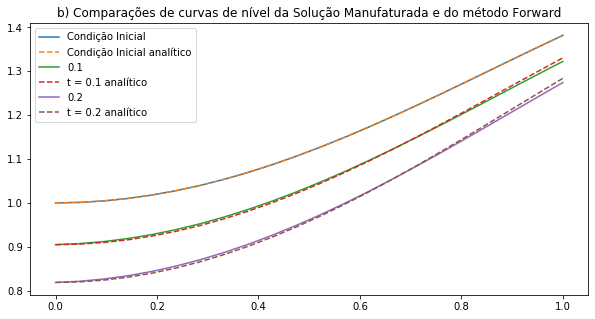

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, u[0], label='Condição Inicial')
ax.plot(x, manufaturada(x, 0), label='Condição Inicial analítico', linestyle='dashed')

ax.plot(x, u[int(0.10 / k)], label='0.1')
ax.plot(x, manufaturada(x, 0.1), label='t = 0.1 analítico', linestyle='dashed')

ax.plot(x, u[int(0.2 / k)], label='0.2')
ax.plot(x, manufaturada(x, 0.2), label='t = 0.2 analítico', linestyle='dashed')

ax.set_title('b) Comparações de curvas de nível da Solução Manufaturada e do método Forward')
ax.legend();

In [19]:
t = np.linspace(0., tf, nt)

In [20]:
%matplotlib notebook

In [21]:
idx = [i*45 for i in range(22)]
T, X = np.meshgrid(t[idx], x)

<IPython.core.display.Javascript object>


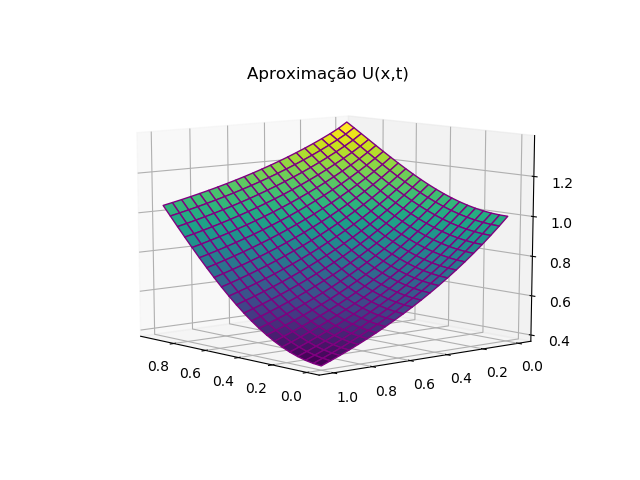

In [22]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, u[idx], cmap ='viridis', edgecolor ='purple') 
ax.set_title('Aproximação U(x,t)') 
plt.show() 

<IPython.core.display.Javascript object>


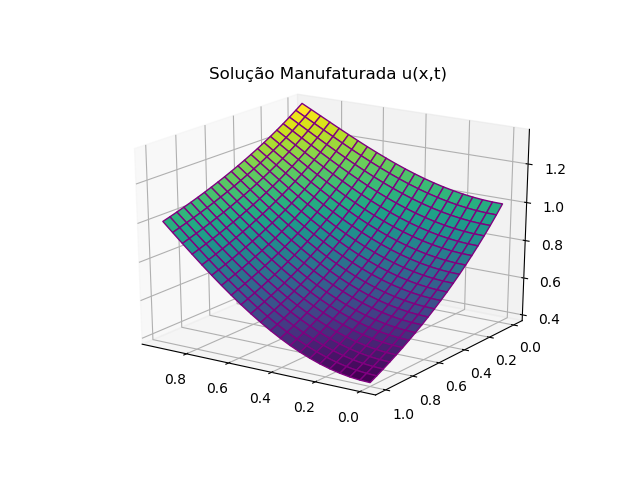

In [236]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, sol[idx], cmap ='viridis', edgecolor ='purple') 
ax.set_title('Solução Manufaturada u(x,t)') 
plt.show() 

<IPython.core.display.Javascript object>


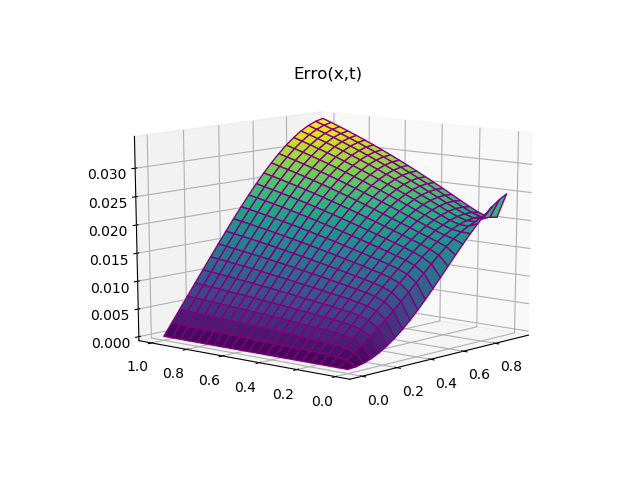

In [235]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, u[idx] - sol[idx], cmap ='viridis', edgecolor ='purple') 
ax.set_title('Erro(x,t)') 
plt.show() 

### b) Crank-Nicolson

In [690]:
nt = 1000
tf = 1.
lx = 1.
k = tf/nt
nx = 13
h = lx / nx
yy = k / (h**2)

In [691]:
from scipy.sparse import diags

params = np.array([(-yy/2)*np.ones(nx-1),(1 + yy)*np.ones(nx),(-yy/2)*np.ones(nx-1)])
offset = [-1,0,1]
A = diags(params,offset).toarray()

paramsB = np.array([(yy/2)*np.ones(nx-1),(1 - yy)*np.ones(nx),(yy/2)*np.ones(nx-1)])
B = diags(paramsB,offset).toarray()

Precisamos fazer algumas modificações em $A$ e em $B$ por conta da condição de contorno de Neumann. Para implementar essa condição, utilizamos a seguinte lógica para a fórmula de segunda ordem de $f'(x)$:

$$
f(x - \Delta t) = f(t) - f'(t)\Delta t + \mathcal{O}(h^2) \\
f(x - 2\Delta t) = f(t) - f'(t)2\Delta t + \mathcal{O}(h^2)
$$

Somando as duas equaçõese desconsiderando os termos $\mathcal{O}(h^2)$ para efeitos de aproximação, vem:

$$
f'(t) \approx \dfrac{f(t - \Delta t) + f(t - 2\Delta t) - 2f(t)}{-3\Delta t}
$$

A condição de neumann nos dá a variação temporal da primeira derivada em $x$ ao final da barra. Podemos utilizar, então, a aproximação $u_x(1,t) = f'(t)$, de onde vem:

$$
f(t) \approx \dfrac{f(t-k)}{2} + \dfrac{f(t-2k)}{2} + \dfrac{3}{2}k u_{x}(1,t)
$$

É importante notar, também, que na extrema direita da malha, considerando o lado direito da equação, nós sabemos o valor de $w_{m+1}^{j}$, pois na primeira iteração $w_{m+1}^{0}$ vem da condição inicial, e nas seguintes equações essa informação é propagada. Portanto, na última linha de $B$ teremos os três últimmos elmentos, e não apenas dois, como seria no caso de um sistema homogêneo de dirchlet (no qual seria considerado que $w_{m+1}^{j} = 0$).

A partir desse raciocínio decorrem as seguintes modificações em $A$ e $B$:

In [693]:
A[-1][-1] = -(3/4.)*yy
A[-1][-2] = 1 + (3/4.)*yy

B[-1][-1] = yy/2
B[-1][-2] = (1 - yy)
B[-1][-3] = yy/2

In [694]:
x = np.linspace(0., lx, nx)
gx = g(x)
u_0 = manufaturada(x,0)
u = np.empty((nt+1, nx))
u[0] = u_0.copy()

A condição de dirichlet terá um efeito apenas na primeira linha do sistema, relativa à extrema esquerda da malha. Neste caso, $w_{1}^{j+1}$ passa para o lado direito como $u(0,(j+1)k)$, equanto $w_{1}^{j}$, já do lado direito, é substituída por $u(0, jk)$.

Dos cálculos feitos acima para a condição de Neumann, o termo que é transportado para o lado direito é $\dfrac{3}{4} \lambda h u_{x}(1,t)$, que deve ser multiplicado por $-1$ ao ser passado para o lado direito (essa condição afeta apenas a última linha do sistema de equações).

Devemos lembrar, também, que $kg(x)$ deve estar presente em todas os sistemas de equações ao longo do tempo. Com isso, precisamos apenas resolver um sistema do tipo:

$$
A\boldsymbol{w}^{j+1} = \boldsymbol{b}
$$

Onde $\boldsymbol{b} = B\boldsymbol{w}^{j} + kg(x) + \boldsymbol{d} + \boldsymbol{n}$, com $\boldsymbol{d} = ([\dfrac{\lambda}{2}(u(0, jk) + u(0, (j+1)k)))], 0, \cdots, 0)^{T}$ e $\boldsymbol{n} = (0, \cdots, 0, [-\dfrac{3}{4}\lambda h u_{x}(1,(j+1)k)])^{T}$.

In [695]:
neubound = np.zeros(nx)
dirbound = np.zeros(nx)

for j in range(nt):
    dirbound[0] = (yy/2)*(dirichlet(j*k) + dirichlet((j+1)*k))
    neubound[-1] = -1*(3./4)*yy*h*neumann((j+1)*k)
    u[j+1] = np.linalg.solve(A, np.matmul(B,u[j]) + k*gx + dirbound + neubound)

In [696]:
err = np.empty(nt+1)
sol = np.empty((nt+1, nx))

for t in range(nt+1):    
    for i in range(nx):
        sol[t][i] = manufaturada(i*h,t*k)
        
    diff = u[t] - sol[t]
    err[t] = np.linalg.norm(diff, 2)

In [697]:
max(err)

0.10980817679904745

In [698]:
t = np.linspace(0., tf, nt)

In [699]:
idx = [i*(math.floor(1000/nx)) for i in range(nx)]
T, X = np.meshgrid(t[idx], x)

<IPython.core.display.Javascript object>


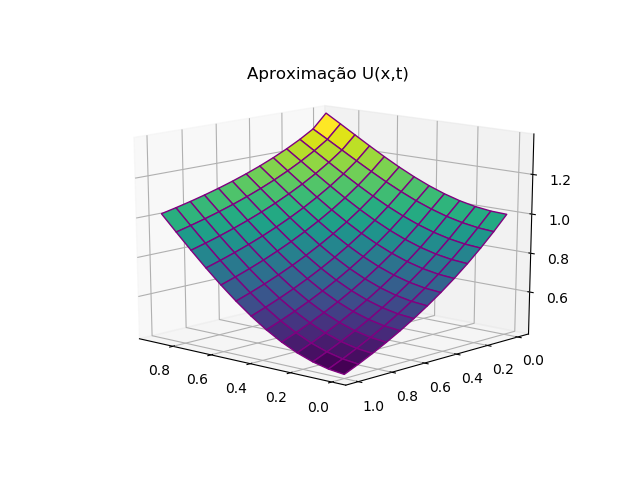

In [700]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt 
  
fig = plt.figure() 
  
# syntax for 3-D plotting 
ax = plt.axes(projection ='3d') 
  
# syntax for plotting 
ax.plot_surface(T, X, u[idx], cmap ='viridis', edgecolor ='purple') 
ax.set_title('Aproximação U(x,t)') 
plt.show() 

### c) Comparação dos métodos

Malha mais grossa versus malha mais fina

### d) Comentários